In [60]:
import numpy as np
import geopandas as gpd
from glob import glob
import rasterio
from rlxutils import subplots
import matplotlib.pyplot as plt

In [2]:
chipsets_file = "/opt/earthdata/chipsets-definitions.parquet"
basedir = "/opt/earthdata/chipsets"
dataset = "s1grdo-202201"

In [10]:
z = gpd.read_parquet(chipsets_file)

In [13]:
z.head()

,geometry
tile_id,
135b822001123,"MULTIPOLYGON (((-176.25110 -44.30865, -176.251..."
155f57837a7fb,"POLYGON ((-177.95819 -29.25608, -177.96029 -29..."
01f60b872e94e,"MULTIPOLYGON (((-175.00000 -21.40917, -175.000..."
3114db1c4e8c8,"MULTIPOLYGON (((-180.00000 -16.75288, -179.930..."
01a9c039cd8c7,"MULTIPOLYGON (((-176.19624 -13.35411, -176.197..."


In [8]:
files = glob(f"{basedir}/*/{dataset}/*tif")
len(files)

902

In [51]:
for file in files[10:11]:
    identifier = file.split("/")[-1].split(".")[0]
    with rasterio.open(file) as rx:
        x = rx.read()
        d = rx.descriptions
        

In [52]:
chipset_file = "/".join(file.split("/")[:-2])+".geojson"
identifier = file.split("/")[-1].split(".")[0]
zc = gpd.read_file(chipset_file)
zc[zc.identifier==identifier].explore()

In [64]:
zc[zc.identifier==identifier].to_file("luxflood1.geojson", driver = 'GeoJSON')

In [65]:
!mv luxflood1.geojson /tmp

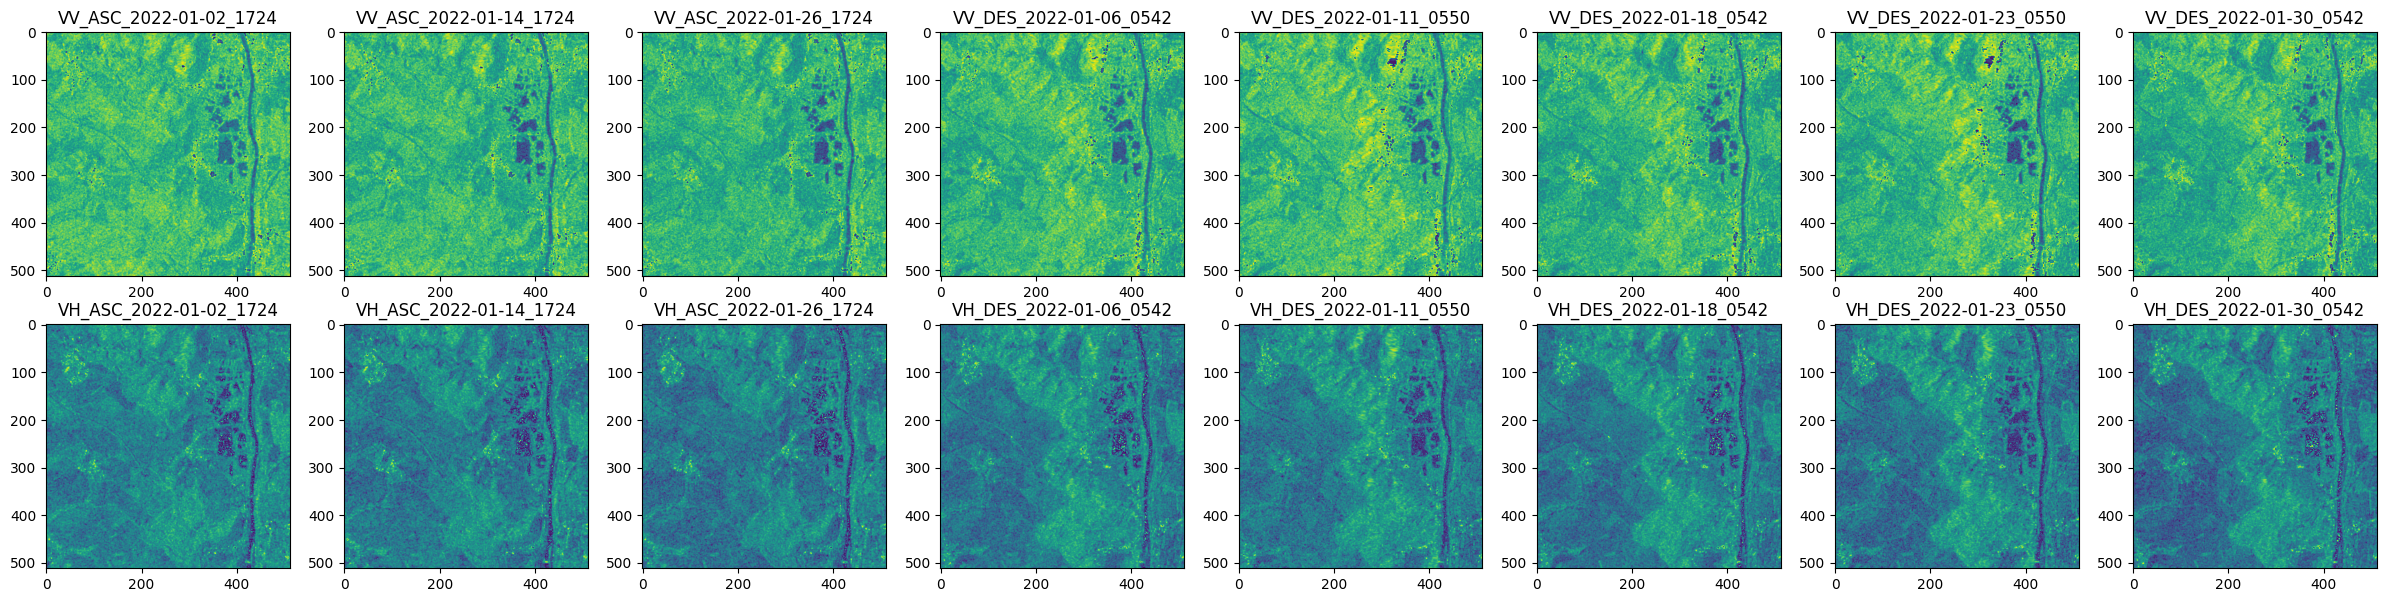

In [66]:
for ax,i in subplots(len(x), n_cols=len(x)//2):
    a,b = np.percentile(x[i], (1,99))
    plt.imshow(x[i])#, vmin=a, vmax=b)
    plt.title(d[i])

might have a flood:

- '/opt/earthdata/chipsets/28c7b4b0200d2_partitions_aschips_37a99155eb305/s1grdo-202201/0f80bd912a277.tif'


In [30]:
src = rasterio.open(file)
src

<open DatasetReader name='/opt/earthdata/chipsets/174963d71226c_partitions_aschips_298b06ee13238/s1grdo-202201/2f4d6ce82885b.tif' mode='r'>

In [29]:
import pyproy

projector = pyproj.Proj(src.crs)
pixelcoord_shapes = [
    Polygon(zip(*(~src.transform * numpy.array(projector(*zip(*shape.boundary.coords))))))
    for shape in shapes
]

[({'type': 'Polygon',
   'coordinates': [[(0.0, 0.0),
     (0.0, 1.0),
     (2.0, 1.0),
     (2.0, 0.0),
     (0.0, 0.0)]]},
  154.0),
 ({'type': 'Polygon',
   'coordinates': [[(2.0, 0.0),
     (2.0, 1.0),
     (6.0, 1.0),
     (6.0, 0.0),
     (2.0, 0.0)]]},
  143.0),
 ({'type': 'Polygon',
   'coordinates': [[(6.0, 0.0),
     (6.0, 1.0),
     (14.0, 1.0),
     (14.0, 0.0),
     (6.0, 0.0)]]},
  118.0),
 ({'type': 'Polygon',
   'coordinates': [[(14.0, 0.0),
     (14.0, 1.0),
     (18.0, 1.0),
     (18.0, 0.0),
     (14.0, 0.0)]]},
  128.0),
 ({'type': 'Polygon',
   'coordinates': [[(18.0, 0.0),
     (18.0, 1.0),
     (22.0, 1.0),
     (22.0, 0.0),
     (18.0, 0.0)]]},
  131.0),
 ({'type': 'Polygon',
   'coordinates': [[(22.0, 0.0),
     (22.0, 1.0),
     (26.0, 1.0),
     (26.0, 0.0),
     (22.0, 0.0)]]},
  128.0),
 ({'type': 'Polygon',
   'coordinates': [[(30.0, 0.0),
     (30.0, 1.0),
     (34.0, 1.0),
     (34.0, 0.0),
     (30.0, 0.0)]]},
  139.0),
 ({'type': 'Polygon',
   'coordin

In [14]:
zs = z[[zi in identifiers for zi in z.index]]

In [18]:
identifiers

['2f4d6ce82885b',
 '2abf8f8caee0f',
 '38a69963bec80',
 '0137342c2dce8',
 '2dc751b0d31f6',
 '068aa2a865287',
 '2380d1551047d',
 '365621f382eb7',
 '096e1a5b4077d',
 '1de2ff6874e46',
 '0f80bd912a277',
 '0d0356e534885',
 '1aaabe13d8d51',
 '159273f5c7112',
 '2a1375d66097c',
 '0c3cf9cc89ec3',
 '2cd8b34470a32',
 '022cb528df481',
 '0de94686d7aed',
 '078599a5a9ae0',
 '1dac7d76781ab',
 '105f81dabcac5',
 '2877a14781499',
 '01140874075a0',
 '012e966203a12',
 '2cb0a5b19ac21',
 '281f1f8f38967',
 '05326fb337e24',
 '2bfa3d0538190',
 '1d0b05f91a13d',
 '25be227479ad3',
 '286caa1f0862e',
 '187911766a032',
 '2761438619638',
 '059becd71008a',
 '16a52d31972e6',
 '00c08b3baf93e',
 '3174c5a0a33d9',
 '24ffac522faf8',
 '12ccfb3e7e7ca',
 '2f177b09e821b',
 '181e3fa0e53b9',
 '18f3aae554931',
 '35919f991965c',
 '361969e2b48f4',
 '0956c48ab5730',
 '33e0b878c09f9',
 '06b24a7a4f575',
 '192a851b6728a',
 '1db623f315752',
 '2da97e1d5f0cf',
 '0f6ee8f13624f',
 '2883fb3128595',
 '0b16580b0c307',
 '0f0561457953e',
 '2b86f292